In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")

In [2]:
# sns.set(style="whitegrid", palette="pastel", color_codes=True)
# sns.mpl.rc("figure", figsize=(10,6))

In [3]:
import geopandas as gpd
soa_shape_map_path = r"UAE_habitats_new1.shp"
soa_shape_map = gpd.read_file(soa_shape_map_path)
# soa_shape_map_geo = soa_shape_map.to_crs(epsg=4326, inplace=True)
# print(soa_shape_map_geo.iloc[0].geometry.centroid.y, soa_shape_map_geo.iloc[0].geometry.centroid.x)

/Users/ngochoang/opt/anaconda3/lib/python3.8/site-packages/geopandas/_compat.py:106: UserWarning: The Shapely GEOS version (3.8.1-CAPI-1.13.3) is incompatible with the GEOS version PyGEOS was compiled with (3.9.1-CAPI-1.14.2). Conversions between both will be slow.
  warnings.warn(


In [4]:
# type(soa_shape_map_geo)

In [5]:
soa_shape_map.head()

,OBJECTID,Id,HabitatTyp,HabitatT_1,HabitatSub,HabitatS_1,RuleID,Shape_Leng,Shape_Area,Habitats,geometry
0,1,1,1000,Intertidal Habitats,1010,Mudflats And Sand Exposed At Low Tide,14,7524.321019,2.115300e+06,Intertidal Habitats,"POLYGON ((53.99011 24.13066, 53.99039 24.13065..."
1,2,2,1000,Intertidal Habitats,1010,Mudflats And Sand Exposed At Low Tide,14,48704.931412,7.777595e+06,Intertidal Habitats,"POLYGON ((54.07207 24.15920, 54.07776 24.15455..."
2,3,3,1000,Intertidal Habitats,1010,Mudflats And Sand Exposed At Low Tide,14,2721.521261,1.367130e+05,Intertidal Habitats,"POLYGON ((54.10483 24.16618, 54.10465 24.16584..."
3,4,4,1000,Intertidal Habitats,1010,Mudflats And Sand Exposed At Low Tide,14,10010.231740,1.424318e+06,Intertidal Habitats,"POLYGON ((54.03827 24.17414, 54.03834 24.17400..."
4,5,5,1000,Intertidal Habitats,1010,Mudflats And Sand Exposed At Low Tide,14,60239.031422,1.222009e+07,Intertidal Habitats,"POLYGON ((54.17323 24.19203, 54.17294 24.19172..."


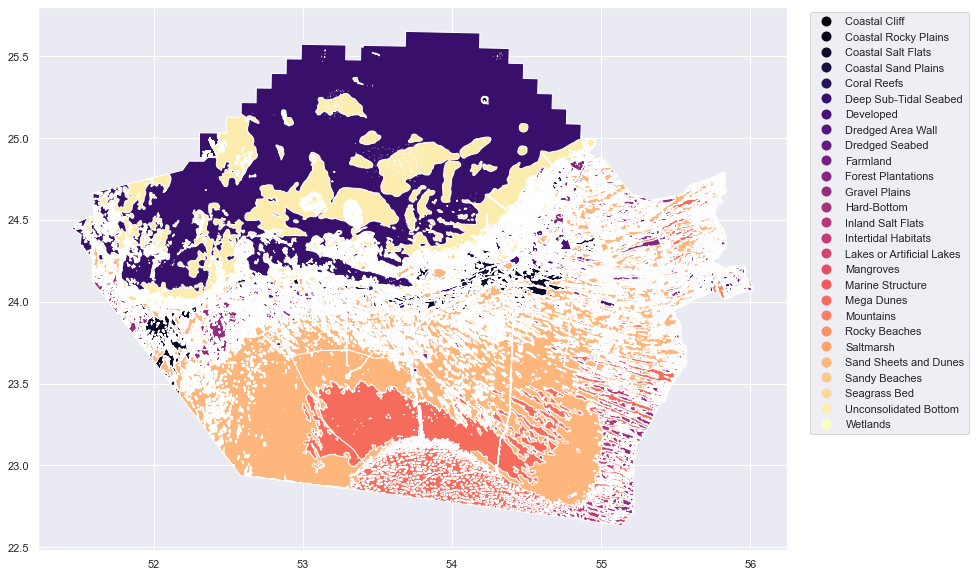

In [6]:
f, ax = plt.subplots(1, 1, figsize=(14, 10))
ax = soa_shape_map.plot(column='Habitats', ax=ax, legend=True, cmap='magma')
leg = ax.get_legend()
leg.set_bbox_to_anchor((1.25, 1))
plt.show()
# plt.legend(handles=soa_shape_map.Habitats, bbox_to_anchor=(1.05, 1), loc='upper left')

## Leafmap

In [7]:
import leafmap

In [ ]:
m = leafmap.Map(zoom=10, center=[24.5, 54.3])

In [9]:
# in_shp = 'UAE_habitats_new1.shp'
# m.add_shp(in_shp, layer_name="Habitats")

In [10]:
to_drop = ['OBJECTID', 'Id', 'HabitatTyp', 'HabitatT_1', 'HabitatSub', 'HabitatS_1', 'RuleID']
gdf = soa_shape_map.drop(columns=to_drop, axis=1)[:3000]
gdf.shape

(3000, 4)

In [11]:
m.add_gdf(gdf, layer_name="Habitats")

In [12]:
m

Map(center=[24.5, 54.3], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out…

## Maps

In [14]:
df = soa_shape_map.to_crs(epsg=3857)

In [16]:
import contextily as ctx

In [20]:
# f, ax = plt.subplots(1, 1, figsize=(14, 10))
# ax = soa_shape_map.plot(column='Habitats', ax=ax, cmap='magma')
# ctx.add_basemap(ax, zoom=10)
# plt.show()
# # plt.legend(handles=soa_shape_map.Habitats, bbox_to_anchor=(1.05, 1), loc='upper left')

## Distribution

In [21]:
soa_shape_map.Habitats.value_counts()

Farmland                     16494
Hard-Bottom                   9995
Developed                     7113
Unconsolidated Bottom         6641
Forest Plantations            5557
Seagrass Bed                  4967
Coral Reefs                   4673
Sand Sheets and Dunes         4463
Gravel Plains                 2682
Mountains                     1067
Dredged Area Wall              817
Coastal Salt Flats             742
Inland Salt Flats              606
Mangroves                      557
Intertidal Habitats            487
Marine Structure               447
Lakes or Artificial Lakes      193
Mega Dunes                     191
Saltmarsh                      175
Coastal Sand Plains            173
Dredged Seabed                 162
Sandy Beaches                   79
Deep Sub-Tidal Seabed           51
Wetlands                        36
Rocky Beaches                   31
Coastal Rocky Plains            12
Coastal Cliff                    1
Name: Habitats, dtype: int64

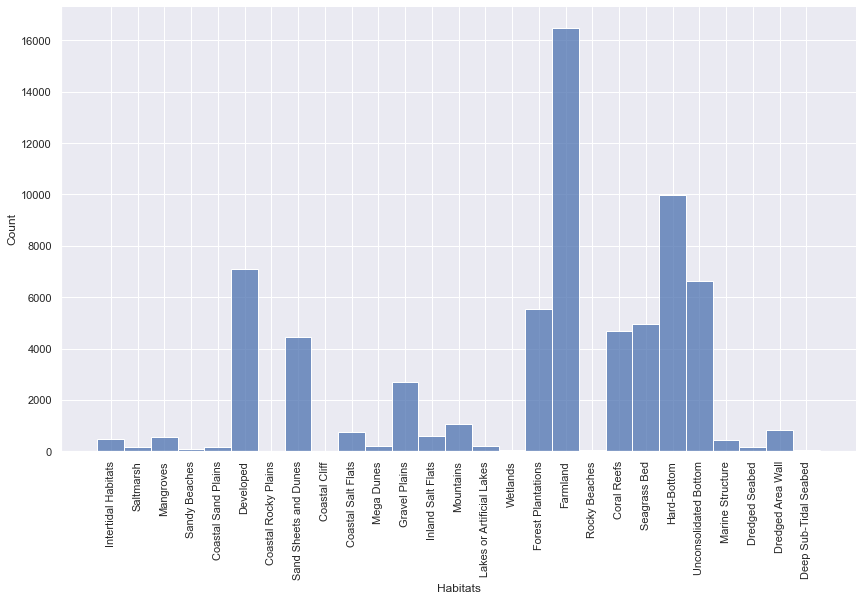

In [31]:
sns.displot(soa_shape_map, x="Habitats", height=7, aspect=1.75)
labels = plt.xticks(rotation=90)